<a href="https://colab.research.google.com/github/billwau/pyspark/blob/master/04_05_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Challenge

## Download and install Spark

In [1]:
!ls

sample_data


In [2]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-2.3.1/spark-2.3.1-bin-hadoop2.7.tgz
!tar xf spark-2.3.1-bin-hadoop2.7.tgz
!pip install -q findspark

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Hit:4 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:12 http://security.ubuntu.com/ubu

## Setup environment

In [3]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.3.1-bin-hadoop2.7"

import findspark
findspark.init()
from pyspark import SparkContext
sc = SparkContext.getOrCreate()

import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate() 
spark

## Downloading and preprocessing Chicago's Reported Crime Data

In [4]:
!wget https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
!ls -l

--2020-04-02 21:17:53--  https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.68.26, 52.206.140.199, 52.206.140.205
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD’

rows.csv?accessType     [          <=>       ]   1.56G  2.99MB/s    in 8m 53s  

2020-04-02 21:26:47 (2.99 MB/s) - ‘rows.csv?accessType=DOWNLOAD’ saved [1673623213]

total 1855008
-rw-r--r--  1 root root 1673623213 Apr  2 11:05 'rows.csv?accessType=DOWNLOAD'
drwxr-xr-x  1 root root       4096 Mar 18 16:23  sample_data
drwxrwxr-x 13 1000 1000       4096 Jun  1  2018  spark-2.3.1-bin-hadoop2.7
-rw-r--r--  1 root root  225883783 Jun  1  2018  spark-2.3.1-bin-hadoop2.7.tgz


In [5]:
!mv rows.csv\?accessType\=DOWNLOAD reported-crimes.csv
!ls -l

total 1855008
-rw-r--r--  1 root root 1673623213 Apr  2 11:05 reported-crimes.csv
drwxr-xr-x  1 root root       4096 Mar 18 16:23 sample_data
drwxrwxr-x 13 1000 1000       4096 Jun  1  2018 spark-2.3.1-bin-hadoop2.7
-rw-r--r--  1 root root  225883783 Jun  1  2018 spark-2.3.1-bin-hadoop2.7.tgz


In [6]:
from pyspark.sql.functions import to_timestamp,col,lit
rc = spark.read.csv('reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') <= lit('2018-11-11'))
rc.show(5)

+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|               Block|IUCR|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|11034701|   JA366925|2001-01-01 11:00:00|     016XX E 86TH PL|1153| DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|           RESIDENCE| false|   false|0412|     004|   8|            45|      11| 

## Challenge questions

**What is the most frequently reported non-criminal activity?**

In [19]:
rc.select(col('Primary Type')).distinct().show(200,False)

+---------------------------------+
|Primary Type                     |
+---------------------------------+
|OFFENSE INVOLVING CHILDREN       |
|CRIMINAL SEXUAL ASSAULT          |
|STALKING                         |
|PUBLIC PEACE VIOLATION           |
|OBSCENITY                        |
|NON-CRIMINAL (SUBJECT SPECIFIED) |
|ARSON                            |
|DOMESTIC VIOLENCE                |
|GAMBLING                         |
|CRIMINAL TRESPASS                |
|ASSAULT                          |
|NON - CRIMINAL                   |
|LIQUOR LAW VIOLATION             |
|MOTOR VEHICLE THEFT              |
|THEFT                            |
|BATTERY                          |
|ROBBERY                          |
|HOMICIDE                         |
|RITUALISM                        |
|PUBLIC INDECENCY                 |
|CRIM SEXUAL ASSAULT              |
|HUMAN TRAFFICKING                |
|INTIMIDATION                     |
|PROSTITUTION                     |
|DECEPTIVE PRACTICE         

In [20]:
rc.groupBy(col('Primary Type')).count().orderBy('count',ascending=False).show(200, False)

+---------------------------------+-------+
|Primary Type                     |count  |
+---------------------------------+-------+
|THEFT                            |1418420|
|BATTERY                          |1232220|
|CRIMINAL DAMAGE                  |771498 |
|NARCOTICS                        |711647 |
|OTHER OFFENSE                    |418832 |
|ASSAULT                          |418507 |
|BURGLARY                         |388028 |
|MOTOR VEHICLE THEFT              |314141 |
|DECEPTIVE PRACTICE               |265490 |
|ROBBERY                          |255599 |
|CRIMINAL TRESPASS                |193370 |
|WEAPONS VIOLATION                |70663  |
|PROSTITUTION                     |68329  |
|PUBLIC PEACE VIOLATION           |47785  |
|OFFENSE INVOLVING CHILDREN       |45705  |
|CRIM SEXUAL ASSAULT              |27190  |
|SEX OFFENSE                      |25296  |
|INTERFERENCE WITH PUBLIC OFFICER |15140  |
|GAMBLING                         |14422  |
|LIQUOR LAW VIOLATION           

In [21]:
rc.cache()
rc.count()

6752603

In [22]:
rc.select(col('Primary Type')).distinct().count()

36

In [24]:
rc.select(col('Primary Type')).distinct().orderBy(col('Primary Type')).show(36,False)

+---------------------------------+
|Primary Type                     |
+---------------------------------+
|ARSON                            |
|ASSAULT                          |
|BATTERY                          |
|BURGLARY                         |
|CONCEALED CARRY LICENSE VIOLATION|
|CRIM SEXUAL ASSAULT              |
|CRIMINAL DAMAGE                  |
|CRIMINAL SEXUAL ASSAULT          |
|CRIMINAL TRESPASS                |
|DECEPTIVE PRACTICE               |
|DOMESTIC VIOLENCE                |
|GAMBLING                         |
|HOMICIDE                         |
|HUMAN TRAFFICKING                |
|INTERFERENCE WITH PUBLIC OFFICER |
|INTIMIDATION                     |
|KIDNAPPING                       |
|LIQUOR LAW VIOLATION             |
|MOTOR VEHICLE THEFT              |
|NARCOTICS                        |
|NON - CRIMINAL                   |
|NON-CRIMINAL                     |
|NON-CRIMINAL (SUBJECT SPECIFIED) |
|OBSCENITY                        |
|OFFENSE INVOLVING CHILDREN 

In [25]:
nc = rc.filter((col('Primary Type')=='NON - CRIMINAL')|(col('Primary Type')=='NON-CRIMINAL')|(col('Primary Type')=='NON - CRIMINAL (SUBJECT SPECIFIED)'))
nc.show(50)

+--------+-----------+-------------------+--------------------+----+--------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+-----------+
|      ID|Case Number|               Date|               Block|IUCR|  Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|Day_of_week|
+--------+-----------+-------------------+--------------------+----+--------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+-----------+
|11249289|   JB176638|2016-12-23 12:00:00| 0000X N CENTRAL AVE|5093|  NON-CRIMINAL|       LOST PASSPORT|     

In [27]:
nc.groupBy(col('Description')).count().orderBy('count',ascending=False).show(50,False)

+-------------------------------------------+-----+
|Description                                |count|
+-------------------------------------------+-----+
|LOST PASSPORT                              |107  |
|FOID - REVOCATION                          |75   |
|NOTIFICATION OF STALKING - NO CONTACT ORDER|8    |
|CONCEALED CARRY LICENSE REVOCATION         |5    |
|FOUND PASSPORT                             |4    |
|GUN OFFENDER NOTIFICATION-NO CONTACT       |3    |
+-------------------------------------------+-----+



**Using a bar chart, plot which day of the week has the most number of reported crime. 
**

In [0]:
from pyspark.sql.functions import dayofweek, col

In [15]:
rc = rc.withColumn('Day_of_week',dayofweek(col('Date')))
rc.show(5)

+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+-----------+
|      ID|Case Number|               Date|               Block|IUCR|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|Day_of_week|
+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+-----------+
|11034701|   JA366925|2001-01-01 11:00:00|     016XX E 86TH PL|1153| DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|           RESIDENCE| false|   false|0412|   

In [16]:
rc.select(col('Day_of_week')).distinct().show()

ERROR! Session/line number was not unique in database. History logging moved to new session 61
+-----------+
|Day_of_week|
+-----------+
|          1|
|          6|
|          3|
|          5|
|          4|
|          7|
|          2|
+-----------+



In [17]:
rc.groupBy(col('Day_of_week')).count().orderBy('count',ascending=False).show()

+-----------+-------+
|Day_of_week|  count|
+-----------+-------+
|          6|1016868|
|          4| 973776|
|          3| 967949|
|          7| 965081|
|          5| 964447|
|          2| 952632|
|          1| 911850|
+-----------+-------+



In [28]:
rc.select(col('Date'), dayofweek(col('Date'))).show(5)

+-------------------+---------------+
|               Date|dayofweek(Date)|
+-------------------+---------------+
|2001-01-01 11:00:00|              2|
|2017-10-08 03:00:00|              1|
|2017-03-28 14:00:00|              3|
|2017-09-09 20:17:00|              7|
|2017-08-26 10:00:00|              7|
+-------------------+---------------+
only showing top 5 rows



In [0]:
from pyspark.sql.functions import date_format

In [31]:
rc.select(col('Date'), date_format(col('Date'),'E')).show(5)

+-------------------+--------------------+
|               Date|date_format(Date, E)|
+-------------------+--------------------+
|2001-01-01 11:00:00|                 Mon|
|2017-10-08 03:00:00|                 Sun|
|2017-03-28 14:00:00|                 Tue|
|2017-09-09 20:17:00|                 Sat|
|2017-08-26 10:00:00|                 Sat|
+-------------------+--------------------+
only showing top 5 rows



In [32]:
rc.groupBy(date_format(col('Date'),'E')).count().orderBy('count',ascending=False).show()

+--------------------+-------+
|date_format(Date, E)|  count|
+--------------------+-------+
|                 Fri|1016868|
|                 Wed| 973776|
|                 Tue| 967949|
|                 Sat| 965081|
|                 Thu| 964447|
|                 Mon| 952632|
|                 Sun| 911850|
+--------------------+-------+



In [33]:
rc.groupBy(date_format(col('Date'),'E')).count().collect()

[Row(date_format(Date, E)='Sun', count=911850),
 Row(date_format(Date, E)='Mon', count=952632),
 Row(date_format(Date, E)='Thu', count=964447),
 Row(date_format(Date, E)='Sat', count=965081),
 Row(date_format(Date, E)='Wed', count=973776),
 Row(date_format(Date, E)='Tue', count=967949),
 Row(date_format(Date, E)='Fri', count=1016868)]

In [35]:
dow = [x[0] for x in rc.groupBy(date_format(col('Date'),'E')).count().collect()]
dow

['Sun', 'Mon', 'Thu', 'Sat', 'Wed', 'Tue', 'Fri']

In [36]:
cnt = [x[1] for x in rc.groupBy(date_format(col('Date'),'E')).count().collect()]
cnt

[911850, 952632, 964447, 965081, 973776, 967949, 1016868]

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
cp = pd.DataFrame({'Day_of_week':dow,'Count':cnt})
cp.head(7)

,Day_of_week,Count
0,Sun,911850
1,Mon,952632
2,Thu,964447
3,Sat,965081
4,Wed,973776
5,Tue,967949
6,Fri,1016868


Text(0.5, 1.0, 'No. of reported crimes per day of the week from 2001 to present')

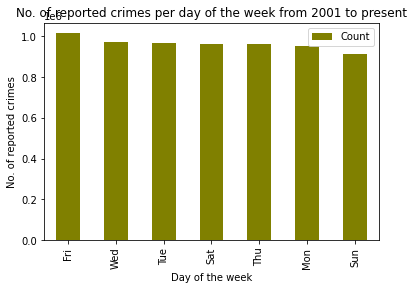

In [43]:
cp.sort_values('Count', ascending=False).plot(kind='bar',color='olive',x='Day_of_week',y='Count')
plt.xlabel('Day of the week')
plt.ylabel('No. of reported crimes')
plt.title('No. of reported crimes per day of the week from 2001 to present')